# SNR-Independent Joint Source-Channel Coding for wireless image transmission

In [1]:
from src import *

from matplotlib import pyplot as plt
import os

from scipy.io import loadmat, savemat
import onnxruntime as ort

ort.set_default_logger_severity(3)


## Load model

In [2]:
encoder_session = CoderSession("models/encoder.onnx")
decoder_session = CoderSession("models/decoder.onnx")


## Load image

In [3]:
input_img_path = "./test/kodim01.png"
orign_img = plt.imread(input_img_path)[:, :, :3]
input_img = prepare_array_input(orign_img)


## Encoding

In [4]:
z = encoder_session.encode(input_img)
z_mat = {"z": z, "label": "z"}
savemat("./test/z.mat", z_mat)


## Add noise
> To add noise to the "z.mat" file, you can utilize the "awgn_channel.m" file located in the `test` directory.

## Decoding

In [5]:
if os.path.exists("./test/z_noised.mat"):
    z = loadmat("./test/z_noised.mat")["z_noised"]
else:
    z = loadmat("./test/z.mat")["z"]
decoded_data = decoder_session.decode(z)
reconstructed_img = reconstruct_image(decoded_data)


PSNR:27.18dB


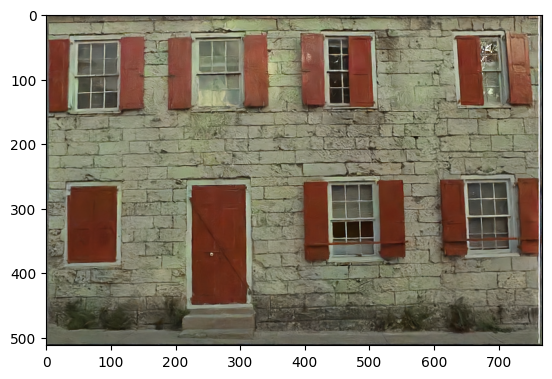

In [6]:
plt.imshow(reconstructed_img)
psnr = compare_psnr(reconstructed_img, orign_img)
print(f"PSNR:{psnr:.2f}dB")
